# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def dice_throw(n):
    return pd.DataFrame(np.array([random.choice(np.arange(1, 7, 1)) for i in range(n)]))

#### 2.- Plot the results sorted by value.

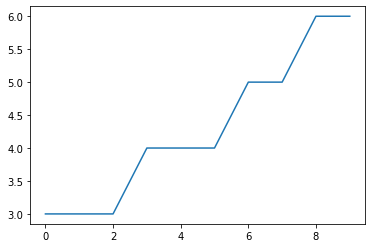

In [6]:
# your code here
dice = dice_throw(10).sort_values(by=0).reset_index()[0]

plt.plot(range(len(dice)), dice)
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

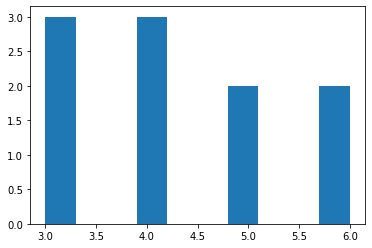

In [14]:
# your code here
plt.hist(dice)
plt.show()

In [ ]:
"""
your comments here

In the first plot we have the number of occurences in the x axis, while in the second graph we have it on the y axis.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [15]:
# your code here
def average(data):
    return sum(data)/len(data)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [56]:
# your code here
def freq(vals):
   
    freq_dist = {}
    for x in vals:
        if x in freq_dist:
            freq_dist[x] += 1
        else:
            freq_dist[x] = 1
            
    return freq_dist, sum([k*v for k, v in freq_dist.items()])/sum([v for k, v in freq_dist.items()])

freq_dist, mean_from_freq = freq(dice)

print(mean_from_freq)
print(np.mean(dice))

4.3
4.3


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [57]:
# your code here
def median(val):
    if len(val) % 2 == 0:
        return sum(val[int(len(val)/2)-1:int(len(val)/2)+1])/2    
    else:
        return val[int(len(val)/2)]

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [58]:
# your code here
def quartiles(vals):    
    half = median(vals)
    
    if len(vals) % 2 == 0:
        first_quartile = median(vals[:int(len(vals)/2)])
        third_quartile = median(vals[int(len(vals)/2):])    
    else:
        first_quartile = median(vals[:int(len(vals)/2)-1])
        third_quartile = median(vals[int(len(vals)/2)+1:])    
    return first_quartile, half, third_quartile

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

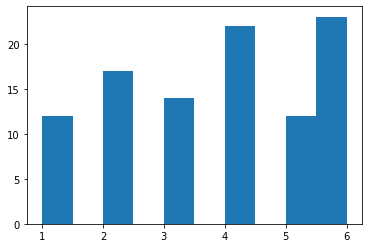

In [22]:
# your code here
df = pd.read_csv('../data/roll_the_dice_hundred.csv')
dice_values = sorted(df['value'])
plt.hist(dice_values)
plt.show()

In [21]:
"""
I see the number of occurences each number appear.
"""
#just to see the table
display(df)

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [59]:
# your code here
print(average(dice_values))
print(quartiles(dice_values))

3.74
(2.0, 4.0, 5.0)


#### 3.- Now, calculate the frequency distribution.


In [61]:
# your code here
print(freq(dice_values))

({1: 12, 2: 17, 3: 14, 4: 22, 5: 12, 6: 23}, 3.74)


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

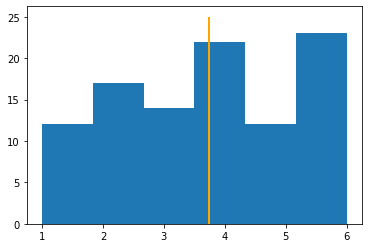

In [28]:
# your code here
plt.hist(dice_values, bins=6)
plt.vlines(df['value'].mean(), ymin=0, ymax=25, lw=2, color='orange')
plt.show()

In [ ]:
"""
the line represents the average. Its not 3.5 because there are more values bigger than 3.5.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

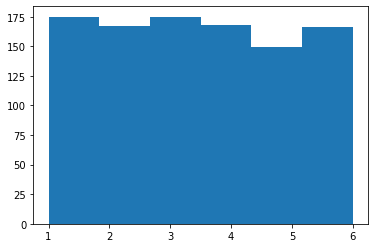

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


In [30]:
# your code here
thousand = pd.read_csv('../data/roll_the_dice_thousand.csv')
plt.hist(thousand['value'], bins= 6)
plt.show()
display(thousand)

In [31]:
"""
Its a uniform distribution because the probability of getting each number is the same (1/6).
"""

'\nIts a uniform distribution because the probability of getting each number is the same (1/6).\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

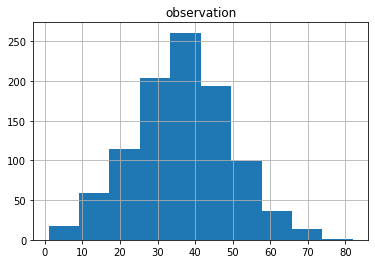

In [34]:
# your code here
ages = pd.read_csv('../data/ages_population.csv')
ages.hist()
plt.show()

# the std deviation is between 15 and 20 and the mean around 45.

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [44]:
# your code here
ages.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [ ]:
"""
My guesses were quite far from the taget. 
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

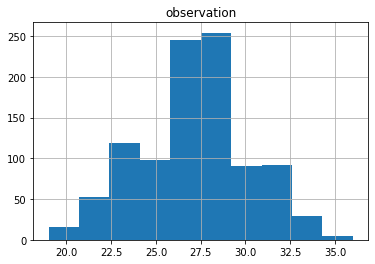

In [46]:
# your code here
ages2 = pd.read_csv('../data/ages_population2.csv')
ages2.hist()
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
This data set is way narrower than the first one.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [45]:
# your code here
ages2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [ ]:
"""
This data set has a group of people with closer ages (younger ages), so the the mean is 27 years and the standard deviation is 3 because the max and then min are closer to each other.  
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

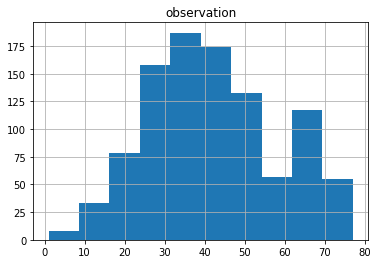

In [48]:
# your code here
ages3 = pd.read_csv('../data/ages_population3.csv')
ages3.hist()
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [49]:
# your code here
ages3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
the high value of occurneces between 60 and 70 increase the std deviation and the mean.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [50]:
# your code here
ages3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
its almost the same but the mean is higher because of the high level of occurences between 60 and 70.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [53]:
# your code here
np.percentile(ages3.observation, 50) #percentile 50. (median)

40.0

In [ ]:
"""
i think this ones are useful enough to take some conclusions. But we could use the formula above.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [55]:
# your code here
display(ages.describe())
display(ages2.describe())
display(ages3.describe())

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
The first one is a wide range age neighbourhood.
the second one is a neighbourhood with probably a university or somethng like that.
The third one is probably a neighbourhood for retired people.
"""